# 數據圖表呈現與分析

在這個章節中，我們試著對一些我們假設的狀況做一些簡單的數據分析。由於我們已經做了一些先前的分析而且有相關的圖資了和欄位資料了，所以我們可以針對這些資料看看是否有統計上的相關。

首先，我們一樣把會用到的插件都匯入。

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

並且把我們的檔案匯入。在這裡比較特別的是，我們把原本的**geodataframe**換成用pandas自己本身沒有地理意義的**dataframe**讀取。這麼做的原因，是為了配合後面**matplotlib**的繪圖功能，若直接使用**geodataframe**可能會有運行不順利的問題。

In [3]:
pre_gdf = gpd.read_file('nanshan_100_TW97_diff.shp')
gdf = pre_gdf.dropna()

df = pd.DataFrame(gdf)
df1 = df.dropna(subset='西元')
df1

編號         緯度          經度     橫額  \
0   {2eb298f7-fd47-4e25-b0de-0e1c93a5fb8a}  22.969411  120.202380     海澄   
1   {bda21cbb-632a-4540-8378-1805f1652207}  22.969329  120.202314     泉州   
3   {4f9a6683-550a-4673-ac35-75dd23500005}  22.968941  120.202245     龍溪   
4   {88370ce7-24b8-4d05-b0c5-507239c05a26}  22.969109  120.202375     台南   
5   {16f62868-653d-49ca-abbf-722e751dcf9c}  22.969115  120.202404     金門   
..                                     ...        ...         ...    ...   
90  {39a590f8-b0c8-4df9-83c0-b2fcb85a88ab}  22.967828  120.201265  崑山 浯江   
91  {273ac9bb-7e99-4b80-9496-41e15b496eb3}  22.968117  120.201287     同安   
96  {69bc57d9-73b9-462b-863a-0d2eea1dbdd2}  22.965812  120.200662     錦繡   
97  {ea6a9e30-a2bc-46c7-abfa-740ebbee2a91}  22.966032  120.200732     金浦   
98  {f431a6e9-0636-4ce1-a096-11b2a4510e12}  22.967167  120.200170     海澄   

        西元  墓葬方?  墓塚形?  Azimuth  size  Azi_river  azi_diff azi_crit  \
0   1921.0   單人葬    漢式    165.0     4     83.694    81.306        1   
1   1927.0  夫妻合葬    漢式    133.0     3     77.630    55.370        0   
3   1975.0  家族合葬  創新形式    145.0     6     92.345    52.655        0   
4   1939.0   單人葬    漢式    165.0     5     92.787    72.213        1   
5   1937.0   單人葬    漢式    110.0     2     59.270    50.730        0   
..     ...   ...   ...      ...   ...        ...       ...      ...   
90  1957.0  家族合葬    漢式    228.0     8    349.401    58.599        0   
91  1967.0  家族合葬    漢式    275.0     8    354.789    79.789        1   
96  1962.0  家族合葬    漢式    280.0     9     15.115    84.885        1   
97  1962.0   單人葬    漢式    270.0    10     15.115    74.885        1   
98  1921.0   單人葬    漢式     95.0     8    349.401    74.401        1   

                          geometry  
0   POINT (168213.910 2541118.106)  
1   POINT (168207.114 2541109.065)  
3   POINT (168199.764 2541066.112)  
4   POINT (168213.226 2541084.624)  
5   POINT (168216.142 2541085.313)  
..                             ...  
90  POINT (168098.560 2540943.422)  
91  POINT (168101.000 2540975.344)  
96  POINT (168035.593 2540720.479)  
97  POINT (168042.863 2540744.802)  
98  POINT (167985.917 2540870.831)  

[76 rows x 13 columns]

另外，我們也匯入經過DSM採樣以及計算相差的結果，稍後我們可以把圖畫在一起做一些比較。

In [5]:
asp = gpd.read_file('nanshan_100_asp_diff.shp')
asp_df = pd.DataFrame(asp)
asp_df = asp_df.dropna(subset='西元')

asp_df

編號         緯度          經度  橫額      西元  \
0   {2eb298f7-fd47-4e25-b0de-0e1c93a5fb8a}  22.969411  120.202380  海澄  1921.0   
1   {bda21cbb-632a-4540-8378-1805f1652207}  22.969329  120.202314  泉州  1927.0   
2   {bc9a26ea-0fcb-44eb-9fa0-4109384b8c0f}  22.969297  120.202294  台南  1937.0   
3   {4f9a6683-550a-4673-ac35-75dd23500005}  22.968941  120.202245  龍溪  1975.0   
4   {88370ce7-24b8-4d05-b0c5-507239c05a26}  22.969109  120.202375  台南  1939.0   
..                                     ...        ...         ...  ..     ...   
94  {bb53f289-44f7-4089-91d9-f580d156a4aa}  22.965603  120.200808  龍溪  1993.0   
95  {26eaa5bd-cf71-4923-aefb-d185dffd9d6c}  22.965574  120.200858  台南  1938.0   
96  {69bc57d9-73b9-462b-863a-0d2eea1dbdd2}  22.965812  120.200662  錦繡  1962.0   
97  {ea6a9e30-a2bc-46c7-abfa-740ebbee2a91}  22.966032  120.200732  金浦  1962.0   
98  {f431a6e9-0636-4ce1-a096-11b2a4510e12}  22.967167  120.200170  海澄  1921.0   

    墓葬方?  墓塚形?  Azimuth  size  Azi_river  azi_diff azi_crit    SAMPLE_1  \
0    單人葬    漢式    165.0     4     83.694    81.306        1  337.800903   
1   夫妻合葬    漢式    133.0     3     77.630    55.370        0  117.673355   
2    單人葬    漢式      5.0     3        NaN       NaN       -1   10.132184   
3   家族合葬  創新形式    145.0     6     92.345    52.655        0  316.455200   
4    單人葬    漢式    165.0     5     92.787    72.213        1  180.083939   
..   ...   ...      ...   ...        ...       ...      ...         ...   
94  家族合葬    墓厝    195.0     6        NaN       NaN       -1  189.075439   
95   單人葬    漢式    183.0     2        NaN       NaN       -1   16.366413   
96  家族合葬    漢式    280.0     9     15.115    84.885        1  256.211456   
97   單人葬    漢式    270.0    10     15.115    74.885        1  291.378448   
98   單人葬    漢式     95.0     8    349.401    74.401        1   73.247955   

    asp_diff                        geometry  
0    172.801  POINT (168213.910 2541118.106)  
1     15.327  POINT (168207.114 2541109.065)  
2      5.132  POINT (168205.033 2541105.535)  
3    171.455  POINT (168199.764 2541066.112)  
4     15.084  POINT (168213.226 2541084.624)  
..       ...                             ...  
94     5.925  POINT (168050.408 2540697.266)  
95   166.634  POINT (168055.559 2540693.976)  
96    23.789  POINT (168035.593 2540720.479)  
97    21.378  POINT (168042.863 2540744.802)  
98    21.752  POINT (167985.917 2540870.831)  

[89 rows x 15 columns]

## 繪製直方圖

我們可以在**matplotlibrary**中用`plt.hist()`這個函數來嘗試繪製直方圖來了解兩筆資料的狀況，就可以讓資料在數字上分布的狀況一目了然：

(0.0, 180.0)

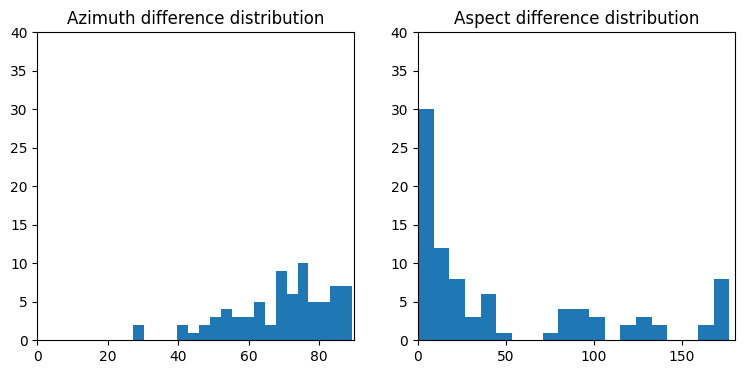

In [17]:
fig1, ax = plt.subplots(1,2, figsize=(9,4))

ax[0].hist(df1['azi_diff'], bins=20, linewidth=0.5)
ax[0].set_title('Azimuth difference distribution')
ax[0].set_ylim((0, 40))
ax[0].set_xlim((0, 90))

ax[1].hist(asp_df['asp_diff'], bins=20, linewidth=0.5)
ax[1].set_title('Aspect difference distribution')
ax[1].set_ylim((0, 40))
ax[1].set_xlim((0, 180))

從結果上可以看到：方位角插值算出來的結果絕大部分集中在40-90的區間當中，但似乎沒有特別集中的趨勢，但在坡向插值分布的結果中可以發現，絕大部分都在0-20之間，雖也有少數資料不符合假設，但絕大多數都和我們想像地一樣：面向低處。

## 繪製箱型圖

**matplotlibrary**內建有`boxplot`這個函數，我們可以用它來看看我們已經得知的某些資料的三個分位數分別在那些位置，又有多少極端值。我們拿前面計算過的面向與河流交角的數字來進行統計：

Text(0.5, 1.0, 'aspect difference')

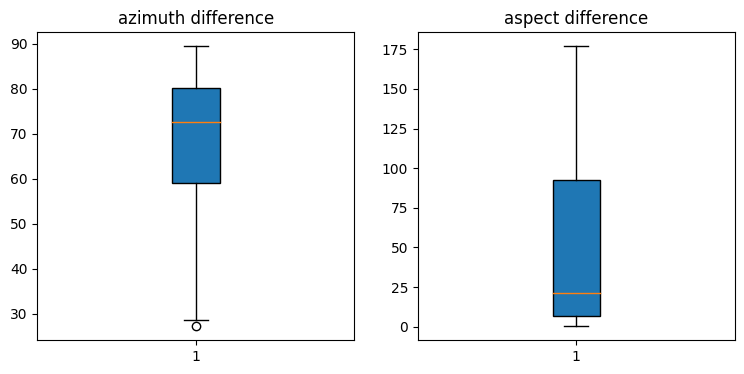

In [19]:
#箱型圖呈現

fig2, axs = plt.subplots(1, 2, figsize=(9,4))

azi_diff = df1['azi_diff']
asp_diff = asp_df['asp_diff']

axs[0].boxplot(azi_diff,vert=True, patch_artist=True)
axs[0].set_title('azimuth difference')
axs[1].boxplot(asp_diff,vert=True, patch_artist=True)
axs[1].set_title('aspect difference')

從這個分析結果可以發現：交角的中位數大致上是一個很接近70的數字，交角的值也僅有一筆資料低於30、是整筆資料的極端值。這似乎也是其中一個可以應證前面關於交角大小的標準設在70的原因之一（儘管這個理由聽起來實在有點薄弱）。而在坡向差的部分，中位數低於25，但仍有到接近175的數值。

## 線性迴歸分析

接下來，我們嘗試做一些簡單的線性迴歸分析。在python的語法中，要做到迴歸函數以及相關係數的計算，必須要用矩陣的方式來運行。我們會設定一個迴歸的方程式，他的線性方程的樣式應該是：

$y=m_1x+m_0$

而他應該是由下面的方程式運算而來：

$m=\begin{bmatrix}
m_0 \\ m_1
\end{bmatrix}=[G^TG]^{-1}G^Td$

其中，G和d應該代表：

$G=
\begin{bmatrix}
1&x_1 \\
1&x_2 \\
...&...\\
1&x_n
\end{bmatrix}$ , $d=
\begin{bmatrix}
y_1\\y_2\\...\\y_n
\end{bmatrix}$

依照這個邏輯，我們可以定義一個可以幫我們透過指定的資訊生產出迴歸直線的函數。以下是定義這個函數的嘗試。

In [ ]:
#def測試

def regression(x1,y1,dataframe):
    v1=np.ones((len(dataframe),))
    v2=x1
    G_1=np.array([v1,v2])
    G = G_1.T
    d=np.array([y1]).T
    m=np.dot(np.dot(np.linalg.inv(np.dot((G.T),G)),(G.T)),d)
    xx=np.linspace(x1.min(),x1.max(),100)
    yy=xx*m[1]+m[0]
    fig1, ax1 = plt.subplots(nrows=1, ncols=1)
    plt.scatter(x1,y1)
    ax1.plot(xx,yy)
    e=(d-np.dot(G,m))
    E=np.sum(e**2)
    dd=d-np.mean(d)
    RR = 1- E/np.sum(dd**2)
    print('correlation coefficient=', RR)

這樣一來，這個函數就定義完成了。接下來我們就可以嘗試隨機作一些簡單的分析。

### 年代與墓碑大小的關係

雖然還不確定年代跟大小可以有甚麼關係，但我們可以先做一個嘗試。我們叫出剛剛定義的功能，輸入兩個指定的欄位以及dataframe：

correlation coefficient= 0.10808491656840813


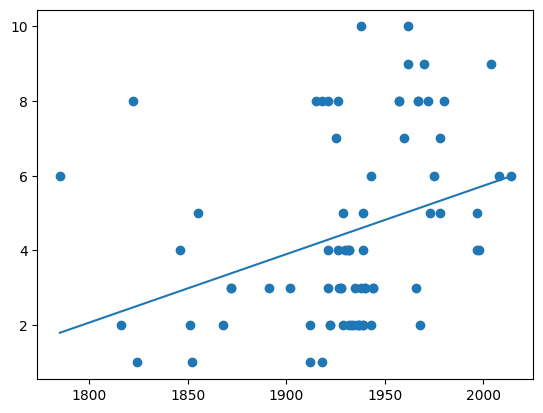

In [ ]:
regression(df1['西元'], df1['size'], df1)

令人意外的結果是看起來還真的有些微的關係：似乎年代越接近現在，人們蓋的墳墓就越有機會越大。但這當然也有可能是一個假的相關（pseudo relationship），畢竟目前我並沒有想到甚麼好的推論可以證成這個相關性，另外就是相關係數也非常低。

### 年代與交角的關係

這兩個數值倒可能有一個關聯性：隨著年代的發展，國家的力量介入墳墓的治理，也開始有道路與管理單位的出現，可能導致越近代的墳墓越不在意風水的假設，反而為了管理方便只是接近於低地或道路。因此，我們嘗試用這兩個變數進行迴歸的分析：

correlation coefficient= 0.001962903658652815


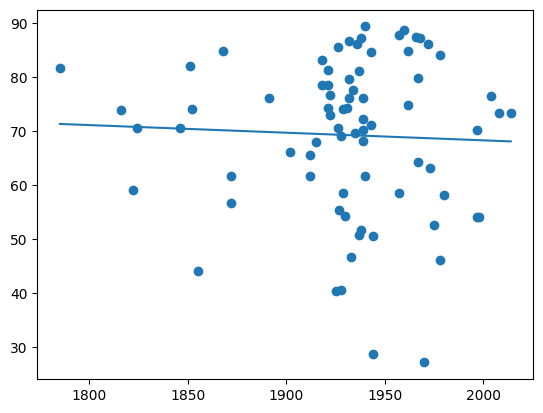

In [ ]:
regression(df1['西元'], df1['azi_diff'], df1)

結果是其實並沒有甚麼特別的相關性。當然這可能也涉及採樣方法等其他的缺失，接下來我會進行一些討論。

## 結果討論

關於這些統計為甚麼看起來沒有顯著的結果，一來是可以歸功於我們的資料採樣問題：就跟我在DEM/DSM分析的章節提到的一樣，這100個墳墓並不是隨機抽樣的結果，而100可能也不是一個達到有代表性意義的樣本數。另外就是我們在理論或經驗上對於某兩個資訊的相關性可以有推斷錯誤， 所以可能本來就不具相關性。

關於年代與風水假設，也許如果有精細的DEM資料允許我們做一些更像是坡向—朝向分析的資料後，也許更可以做到一些有相關性的分析。總而言之，在統計的部分也許還有待探索。